___
<a href='https://cafe.naver.com/jmhonglab'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="50%" height="50%"/></p></a>
___
<center><em>Content Copyright by HongLab, Inc.</em></center>

# 인스타그램 필터 GUI


사진 가운데 잘라내고 리사이즈

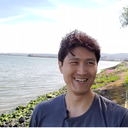

In [2]:
from PIL import Image

def read_square_image(filename, size):
    """이미지를 읽어서 가운데를 1:1 aspect ratio로 잘라내고 크기 변경"""

    img = Image.open(filename).convert("RGB")

    w, h = img.size
    if w > h:
        d = (w - h) // 2
        img = img.crop((d, 0, h + d, h))
    else:
        d = (h - w) // 2
        img = img.crop((0, d, w, w + d))

    return img.resize((size, size), Image.ANTIALIAS)

img = read_square_image("jmhong_face.jpg", 128)
img

버튼, 레이블, 캔버스에 이미지 보이기 (TkImage 변환도 필요)

In [ ]:
from tkinter import *
from PIL import Image, ImageTk

window = Tk()

# 주의 window 생성 후에 ImageTk 생성
# 커널 리스타트 필요
img_tk = ImageTk.PhotoImage(img)

canvas = Canvas(window, bg="white", width=128, height=128)
canvas.create_image(0, 0, anchor=NW, image=img_tk) # 다른 이미지로 교체할 때도 사용 가능

label = Label(window, image=img_tk)
#label["image"] = img_tk # 다른 이미지로 교체도 가능

button = Button(window, image=img_tk)

canvas.pack(side=LEFT)
label.pack(side=LEFT)
button.pack(side=LEFT)

window.mainloop()

레이블과 버튼을 프레임으로 묶기

In [ ]:
from tkinter import *
from PIL import Image, ImageTk

window = Tk()

# 주의 window 생성 후에 ImageTk 생성
# 커널 리스타트 필요
img_tk = ImageTk.PhotoImage(img)

frame1 = Frame(window)
frame2 = Frame(window)

label1 = Label(frame1, text="Frame1")
button1 = Button(frame1, image=img_tk)

label1.pack(side=TOP)
button1.pack(side=TOP)

label2 = Label(frame2, text="Frame2")
button2 = Button(frame2, image=img_tk)

label2.pack(side=TOP)
button2.pack(side=TOP)

frame1.pack(side=LEFT)
frame2.pack(side=LEFT)

window.mainloop()

### 딥러닝 필터들

만화 필터

Using cache found in C:\Users\jmhong/.cache\torch\hub\bryandlee_animegan2-pytorch_main
Using cache found in C:\Users\jmhong/.cache\torch\hub\bryandlee_animegan2-pytorch_main


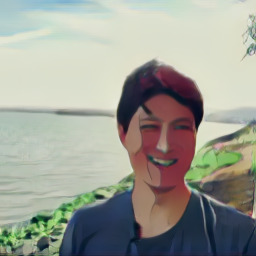

In [3]:
from PIL import Image
import torch

img = read_square_image("jmhong_face.jpg", 256)

def cartoonify(img, pretrained, size):
    model = torch.hub.load(
        "bryandlee/animegan2-pytorch:main", "generator", pretrained=pretrained
    )
    face2paint = torch.hub.load(
        "bryandlee/animegan2-pytorch:main", "face2paint", size=size
    )
    return face2paint(model, img)

img = cartoonify(img, "paprika", 256)

img

[PyTorch fast-neural-style](https://github.com/pytorch/examples/tree/main/fast_neural_style)
- Python 3.10, PyTorch 1.11.0+cpu
- 모델 다운로드 안내
- 강의 노트와 함께 ```hlab_fast_neural_style``` 제공


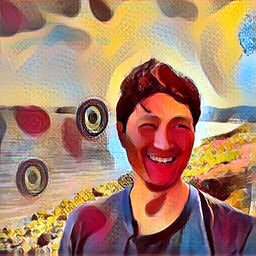

In [4]:
from PIL import Image
import hlab_fast_neural_style

img = read_square_image("jmhong_face.jpg", 256)

img = hlab_fast_neural_style.stylize(img, "saved_models/candy.pth")

img

### 실습 과정

[주의] 이미지 파일, 모델 파일 경로 주의


**1단계** 힌트만 보고 스스로 구현해보기 또는 인스타그램필터_실습.py 참고해서 구현

**2단계** 인스타그램필터(OOP)_실습.py 참고해서 구현

